# Linear Regression

In [1]:
import torch
import torch.nn as nn # 신경망을 구성할 때 필요한 요소들은 대부분 nn에 구현되어 있습니다.
import numpy as np
import matplotlib.pyplot as plt

하이퍼파라미터를 선언합니다. epochs는 전체 데이터셋을 몇번 반복하여 학습할지를 나타내는 값 이며 learning_rate는 경사하강법을 수행할 때의 알파값입니다. 이 값은 한번 step을 밟을 때 경사를 따라 얼마나 이동할 지를 정합니다. 이 값이 너무 크다면 오차는 발산하게 될 것이며 너무 작다면 지역최소값(Local Minumum)에서 빠져나오지 못할 수 있으며 전역최소값(Global Minimun)에 수렴할 때 너무 오랜 시간이 걸릴 수 있습니다.

In [2]:
input_size = 1
output_size = 1
epochs = 100
learning_rate = 0.001

x는 input이며 y는 label입니다. 이 예제에서는 15개의 데이터로 만들었습니다.

In [3]:
x = torch.tensor([[1.5], [2.2], [4.2], [4.5], [5.1], [7.1], [7.5], [8.1],
              [8.9], [9.4], [10.5], [11.2], [12.5], [13.5], [15.5]], dtype=torch.float32)

In [4]:
y = torch.tensor([[5.2], [6.2], [7.6], [8.8], [10.2], [10.5], [11.5], [13.4],
             [14.5], [17.1], [17.8], [19.1], [19.3], [21.5], [21.6]], dtype=torch.float32)

데이터의 분포를 보여주는 그래프입니다.

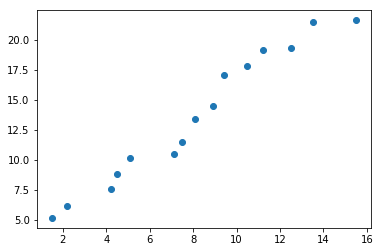

In [5]:
plt.scatter(x, y)
plt.show()

핵심이 되는 model 구현입니다. 선형회귀는 `nn.Linear()`를 사용하며 매개변수로는 먼저 입력데이터의 크기가 들어가고 이후 출력 데이터의 크기가 들어갑니다. `nn.Linear()`는 이후 신경망을 구현할 때 Fully Connected Layer로 다시 등장합니다.

In [6]:
model = nn.Linear(input_size, output_size)

선형회귀를 위해서 cost Function은 평균제곱오차를 사용했습니다.

In [7]:
cost_function = nn.MSELoss()

최적화 함수를 구현합니다. 이 모델에서는 SGD(확률적경사하강법)을 사용하였지만 `torch.optim`에는 많은 최적화 알고리즘이 구현되어 있습니다. 대표적으로 `torch.optim.Adam`, `torch.optim.RMSprop` 등이 있습니다.

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
val_loss = [] # 학습 후 loss 값의 변화를 보기 위해서 리스트를 선언합니다.

for epoch in range(epochs):
    outputs = model(x) # 입력데이터를 모델에 넣으면 그에 따른 결과가 반환됩니다.
    loss = cost_function(outputs, y) # 실제 정답인 y와 모델에 대한 결과로 나온 outputs의 오차를 계산합니다.
    val_loss.append(loss) # 매 epoch마다 loss를 val_loss 리스트에 담습니다.
    
    optimizer.zero_grad()
    loss.backward() # Backpropagation을 수행합니다. 기울기를 구하는 과정입니다.
    optimizer.step() # 최적화를 수행합니다. learning rate만큼 기울기를 따라 이동하는 과정입니다.
    
    if not (epoch+1)%5: # 5epoch마다 한번씩 결과를 출력합니다.
        print("Epoch[{}/{}], Loss={}".format(epoch+1, epochs, loss.item()))

Epoch[5/100], Loss=83.54203033447266
Epoch[10/100], Loss=15.898209571838379
Epoch[15/100], Loss=4.746147632598877
Epoch[20/100], Loss=2.9036459922790527
Epoch[25/100], Loss=2.595329523086548
Epoch[30/100], Loss=2.5398566722869873
Epoch[35/100], Loss=2.5260705947875977
Epoch[40/100], Loss=2.519169807434082
Epoch[45/100], Loss=2.513422966003418
Epoch[50/100], Loss=2.5078842639923096
Epoch[55/100], Loss=2.50239634513855
Epoch[60/100], Loss=2.4969351291656494
Epoch[65/100], Loss=2.4914958477020264
Epoch[70/100], Loss=2.486076831817627
Epoch[75/100], Loss=2.4806787967681885
Epoch[80/100], Loss=2.4753024578094482
Epoch[85/100], Loss=2.4699461460113525
Epoch[90/100], Loss=2.4646103382110596
Epoch[95/100], Loss=2.4592952728271484
Epoch[100/100], Loss=2.4539997577667236


loss가 감소하는 것을 보여주는 그래프입니다.

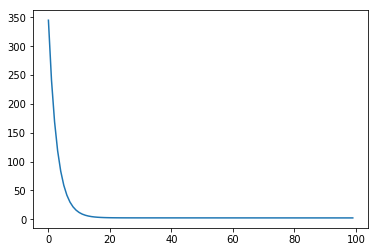

In [10]:
plt.plot(val_loss)
plt.show()

모델을 `model.ckpt`라는 이름으로 저장합니다. 차후 이 모델을 불러올 수 있습니다.

In [11]:
torch.save(model.state_dict(), 'model.ckpt')